In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

# Data loading of 2015 and 2016

In [353]:
data_2015 = pd.read_csv('2015-building-energy-benchmarking.csv')

In [354]:
data_2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

# Fusion of dataframes of years 2015 et 2016

Data 2015 : Number of lign and column

In [355]:
data_2015.shape

(3340, 47)

Data 2016 : Number of lign and column

In [356]:
data_2016.shape

(3376, 46)

In [357]:
#data_2015[data_2015.columns.difference(data_2016.columns)]

Difference between columns of dataframe of 2015 and 2016

In [358]:
data_2016[data_2016.columns.difference(data_2015.columns)]

,Address,City,Comments,GHGEmissionsIntensity,Latitude,Longitude,State,TotalGHGEmissions,ZipCode
0,405 Olive way,Seattle,NaN,2.83,47.61220,-122.33799,WA,249.98,98101.0
1,724 Pine street,Seattle,NaN,2.86,47.61317,-122.33393,WA,295.86,98101.0
2,1900 5th Avenue,Seattle,NaN,2.19,47.61393,-122.33810,WA,2089.28,98101.0
3,620 STEWART ST,Seattle,NaN,4.67,47.61412,-122.33664,WA,286.43,98101.0
4,401 LENORA ST,Seattle,NaN,2.88,47.61375,-122.34047,WA,505.01,98121.0
...,...,...,...,...,...,...,...,...,...
3371,1600 S Dakota St,Seattle,NaN,1.70,47.56722,-122.31154,WA,20.94,NaN
3372,719 8th Ave S,Seattle,NaN,2.01,47.59625,-122.32283,WA,32.17,NaN
3373,1920 1st Ave W,Seattle,NaN,16.99,47.63644,-122.35784,WA,223.54,NaN
3374,8319 8th Ave S,Seattle,NaN,1.57,47.52832,-122.32431,WA,22.11,NaN


Check on order of magnitude GHGEmissionsIntensity and TotalGHGEmissions to verify their presence in 2015 Dataframe

In [359]:
data_2016[['GHGEmissionsIntensity','TotalGHGEmissions']].describe()

,GHGEmissionsIntensity,TotalGHGEmissions
count,3367.000000,3367.000000
mean,1.175916,119.723971
std,1.821452,538.832227
min,-0.020000,-0.800000
25%,0.210000,9.495000
50%,0.610000,33.920000
75%,1.370000,93.940000
max,34.090000,16870.980000


Check on order of magnitude GHGEmissionsIntensity(kgCO2e/ft2) and GHGEmissions(MetricTonsCO2e)' to verify their correspondence to the features present in 2016 Dataframe, GHGEmissionsIntensity and TotalGHGEmissions

In [360]:
data_2015[['GHGEmissionsIntensity(kgCO2e/ft2)','GHGEmissions(MetricTonsCO2e)']].describe()

,GHGEmissionsIntensity(kgCO2e/ft2),GHGEmissions(MetricTonsCO2e)
count,3330.000000,3330.000000
mean,0.985339,110.094102
std,1.637172,409.450179
min,0.000000,0.000000
25%,0.080000,9.265000
50%,0.460000,32.740000
75%,1.180000,88.642500
max,31.380000,11824.890000


The feature GHGEmissionsIntensity(kgCO2e/ft2) corresponds to 'GHGEmissionsIntensity

The feature GHGEmissions(MetricTonsCO2e) corresponds to TotalGHGEmissions

In [361]:
data_2015 = data_2015.rename(columns={'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity','GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions'})

#### Removal of features that we will not use

In [362]:
listOut2016 = set(data_2016.columns)-set(data_2015.columns)

In [363]:
listOut2016

{'Address', 'City', 'Comments', 'Latitude', 'Longitude', 'State', 'ZipCode'}

In [364]:
data_2016 = data_2016.drop(listOut2016, axis=1)

In [365]:
data_2016.shape

(3376, 39)

We remove the columns of 2015's Dataframe

In [366]:
listOut2015 = set(data_2015.columns)-set(data_2016.columns)

In [367]:
listOut2015
#[col for col in data_2015 if col not in data_2016]

{'2010 Census Tracts',
 'City Council Districts',
 'Comment',
 'Location',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes'}

In [368]:
data_2015.shape

(3340, 47)

In [369]:
data_2015 = data_2015.drop(listOut2015, axis=1)

In [370]:
data_2015.shape

(3340, 39)

Verification of columns' type data_2015 and data_2016

In [371]:
data_2015.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
YearBuilt                            int64
NumberofBuildings                    int64
NumberofFloors                     float64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
YearsENERGYSTARCertified            object
ENERGYSTARScore                    float64
SiteEUI(kBt

In [372]:
data_2016.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
YearsENERGYSTARCertified            object
ENERGYSTARScore                    float64
SiteEUI(kBt

In [373]:
listTypes = [(data_2016.dtypes.isin(data_2015.dtypes))]

In [374]:
listTypes

[OSEBuildingID                       True
 DataYear                            True
 BuildingType                        True
 PrimaryPropertyType                 True
 PropertyName                        True
 TaxParcelIdentificationNumber       True
 CouncilDistrictCode                 True
 Neighborhood                        True
 YearBuilt                           True
 NumberofBuildings                   True
 NumberofFloors                      True
 PropertyGFATotal                    True
 PropertyGFAParking                  True
 PropertyGFABuilding(s)              True
 ListOfAllPropertyUseTypes           True
 LargestPropertyUseType              True
 LargestPropertyUseTypeGFA           True
 SecondLargestPropertyUseType        True
 SecondLargestPropertyUseTypeGFA     True
 ThirdLargestPropertyUseType         True
 ThirdLargestPropertyUseTypeGFA      True
 YearsENERGYSTARCertified            True
 ENERGYSTARScore                     True
 SiteEUI(kBtu/sf)                 

Update the type of column DefaultData : Change the type of column DefaultData from object to boolean for data_2015

In [375]:
data_2015["DefaultData"].unique()

array(['No', 'Yes', nan], dtype=object)

In [376]:
data_2015["DefaultData"].replace({"Yes": "True", "No": "False"}, inplace=True)

In [377]:
data_2015["DefaultData"] = data_2015["DefaultData"].astype('bool')

In [378]:
[(data_2016.dtypes.isin(data_2015.dtypes))]

[OSEBuildingID                      True
 DataYear                           True
 BuildingType                       True
 PrimaryPropertyType                True
 PropertyName                       True
 TaxParcelIdentificationNumber      True
 CouncilDistrictCode                True
 Neighborhood                       True
 YearBuilt                          True
 NumberofBuildings                  True
 NumberofFloors                     True
 PropertyGFATotal                   True
 PropertyGFAParking                 True
 PropertyGFABuilding(s)             True
 ListOfAllPropertyUseTypes          True
 LargestPropertyUseType             True
 LargestPropertyUseTypeGFA          True
 SecondLargestPropertyUseType       True
 SecondLargestPropertyUseTypeGFA    True
 ThirdLargestPropertyUseType        True
 ThirdLargestPropertyUseTypeGFA     True
 YearsENERGYSTARCertified           True
 ENERGYSTARScore                    True
 SiteEUI(kBtu/sf)                   True
 SiteEUIWN(kBtu/

In [379]:
data_2016.shape

(3376, 39)

In [380]:
data_2015.shape

(3340, 39)

Find the number of buildings that differ between 2015 and 2016

In [381]:
# 92 buildings present in 2016 and absent in 2015
len(set(data_2016['OSEBuildingID'])-set(data_2015['OSEBuildingID']))

92

In [382]:
# 56 buildings present in 2015 and absent in 2016
len(set(data_2015['OSEBuildingID'])-set(data_2016['OSEBuildingID']))

56

# Data Concatenation 2015 and 2016

Concatenation to detect add/remove buildings in Dataframes

In [383]:
data_2015_2016_df = pd.concat([data_2015,data_2016], ignore_index=True)
#data_2015_2016_all = pd.concat([data_2015[['SiteEnergyUse(kBtu)','TotalGHGEmissions']],data_2016], ignore_index=True)

In [384]:
data_2015_2016_df.shape

(6716, 39)

### Drop of consumption features

In [385]:
data_2015_2016_all_df1 = data_2015_2016_df.drop(['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)','Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)'], axis=1)

### Drop duplicates

In [386]:
data_2015_2016_all_df2 = data_2015_2016_all_df1.groupby(["OSEBuildingID"]).agg("mean")

In [387]:
listCategorical = data_2016.select_dtypes(include=['object']).columns.tolist()

In [388]:
listCategorical.insert(1, "OSEBuildingID")

In [389]:
data_2015_2016_all = data_2016[listCategorical].join(data_2015_2016_all_df2, on=["OSEBuildingID"], how="inner")

In [390]:
data_2015_2016_all.shape

(3376, 29)

# Removal of non-residential buildings

Identification of building's type

In [391]:
data_2015_2016_all['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [392]:
data_2015_2016 = data_2015_2016_all[~data_2015_2016_all['BuildingType'].str.contains("Multifamily")]

In [393]:
data_2015_2016['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

Check shape of the Dataframe

In [394]:
data_2015_2016.shape

(1668, 29)

# Exploratory analysis

### Missing values analysis

In [395]:
data_2015_2016.head(2)

,BuildingType,OSEBuildingID,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,...,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData
0,NonResidential,1,Hotel,Mayflower park hotel,0659000030,DOWNTOWN,Hotel,Hotel,NaN,NaN,...,0.0,88434.0,88434.0,NaN,NaN,62.5,7103895.25,249.705,2.735,0.5
1,NonResidential,2,Hotel,Paramount Hotel,0659000220,DOWNTOWN,"Hotel, Parking, Restaurant",Hotel,Parking,Restaurant,...,15064.0,88502.0,83880.0,15064.0,4622.0,56.0,8371084.00,279.685,2.620,0.5


Nan mean per feature

In [396]:
#Qualifier fonctionnellement la donnée
data_2015_2016.isna().mean().sort_values(ascending=False)

Outlier                            0.989808
YearsENERGYSTARCertified           0.941247
ThirdLargestPropertyUseType        0.788369
ThirdLargestPropertyUseTypeGFA     0.785372
SecondLargestPropertyUseType       0.487410
SecondLargestPropertyUseTypeGFA    0.486211
ENERGYSTARScore                    0.318945
LargestPropertyUseTypeGFA          0.003597
LargestPropertyUseType             0.003597
ListOfAllPropertyUseTypes          0.001199
PropertyGFABuilding(s)             0.000000
BuildingType                       0.000000
PropertyGFATotal                   0.000000
SiteEnergyUse(kBtu)                0.000000
TotalGHGEmissions                  0.000000
GHGEmissionsIntensity              0.000000
PropertyGFAParking                 0.000000
CouncilDistrictCode                0.000000
NumberofFloors                     0.000000
NumberofBuildings                  0.000000
YearBuilt                          0.000000
OSEBuildingID                      0.000000
DataYear                        

Generation of Dataframe Nan mean per feature (to filter the datas)

In [397]:
dataNA = data_2015_2016.isna().mean().to_frame()

In [398]:
dataNA.columns = ['Moyenne NA par colonne']

In [399]:
dataNA.describe()

,Moyenne NA par colonne
count,29.000000
mean,0.165716
std,0.320899
min,0.000000
25%,0.000000
50%,0.000000
75%,0.003597
max,0.989808


Filter on feature with a mean higher than 50% of NAN

In [400]:
listeColumnNA = dataNA[dataNA['Moyenne NA par colonne'] > 0.5].index.tolist()

In [401]:
listeColumnNA

['ThirdLargestPropertyUseType',
 'YearsENERGYSTARCertified',
 'Outlier',
 'ThirdLargestPropertyUseTypeGFA']

We keep the feature with a mean lower than 50% of NAN

In [402]:
listeColumn = dataNA[dataNA['Moyenne NA par colonne'] < 0.5].index.tolist()

We want to take into account the datat in 'Outlier' column

Filter on column named 'Outlier' before preprocessing outliers

In [403]:
data_2015_2016['Outlier'].unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [404]:
data_2015_2016withOutlier = data_2015_2016[~data_2015_2016['Outlier'].str.contains("High", na=False)]

In [405]:
data_2015_2016withOutlier.shape

(1666, 29)

In [406]:
data_2015_2016withOutlier['Outlier'].unique()

array([nan, 'Low outlier'], dtype=object)

We apply the filter to remove features with a lot of NAN

In [407]:
data_2015_2016_OutColumns = data_2015_2016withOutlier[listeColumn]

In [408]:
data_2015_2016_OutColumns.shape

(1666, 25)

Verification of unique value

In [409]:
data_2015_2016_OutColumns.apply(pd.Series.nunique).sort_values(ascending = False)

OSEBuildingID                      1666
SiteEnergyUse(kBtu)                1666
PropertyName                       1662
TotalGHGEmissions                  1647
PropertyGFATotal                   1590
TaxParcelIdentificationNumber      1585
PropertyGFABuilding(s)             1585
LargestPropertyUseTypeGFA          1561
GHGEmissionsIntensity               754
SecondLargestPropertyUseTypeGFA     704
ListOfAllPropertyUseTypes           373
PropertyGFAParking                  352
ENERGYSTARScore                     193
YearBuilt                           113
LargestPropertyUseType               56
SecondLargestPropertyUseType         47
NumberofFloors                       45
PrimaryPropertyType                  22
NumberofBuildings                    19
Neighborhood                         19
CouncilDistrictCode                   8
BuildingType                          5
ComplianceStatus                      4
DefaultData                           3
DataYear                              2


## Replacement and Removal of NAN

In [410]:
data_2015_2016_OutColumns.shape

(1666, 25)

In [411]:
data_2015_2016_OutColumns.isna().mean().sort_values(ascending=False)

SecondLargestPropertyUseType       0.487995
SecondLargestPropertyUseTypeGFA    0.486795
ENERGYSTARScore                    0.318727
LargestPropertyUseType             0.003601
LargestPropertyUseTypeGFA          0.003601
ListOfAllPropertyUseTypes          0.001200
BuildingType                       0.000000
NumberofFloors                     0.000000
GHGEmissionsIntensity              0.000000
TotalGHGEmissions                  0.000000
SiteEnergyUse(kBtu)                0.000000
PropertyGFABuilding(s)             0.000000
PropertyGFAParking                 0.000000
PropertyGFATotal                   0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.000000
OSEBuildingID                      0.000000
CouncilDistrictCode                0.000000
DataYear                           0.000000
ComplianceStatus                   0.000000
Neighborhood                       0.000000
TaxParcelIdentificationNumber      0.000000
PropertyName                    

In [412]:
data_2015_2016_OutColumn = data_2015_2016_OutColumns.copy()

In [413]:
data_2015_2016_OutColumn['SecondLargestPropertyUseTypeGFA'] = data_2015_2016_OutColumns['SecondLargestPropertyUseTypeGFA'].fillna(data_2015_2016_OutColumns['SecondLargestPropertyUseTypeGFA'].mean())
data_2015_2016_OutColumn['ENERGYSTARScore'] = data_2015_2016_OutColumns['ENERGYSTARScore'].fillna(data_2015_2016_OutColumns['ENERGYSTARScore'].mean())
data_2015_2016_OutColumn['LargestPropertyUseTypeGFA'] = data_2015_2016_OutColumns['LargestPropertyUseTypeGFA'].fillna(data_2015_2016_OutColumns['LargestPropertyUseTypeGFA'].mean())

In [414]:
data_2015_2016_OutColumn.isna().mean().sort_values(ascending=False)

SecondLargestPropertyUseType       0.487995
LargestPropertyUseType             0.003601
ListOfAllPropertyUseTypes          0.001200
BuildingType                       0.000000
NumberofFloors                     0.000000
GHGEmissionsIntensity              0.000000
TotalGHGEmissions                  0.000000
SiteEnergyUse(kBtu)                0.000000
ENERGYSTARScore                    0.000000
SecondLargestPropertyUseTypeGFA    0.000000
LargestPropertyUseTypeGFA          0.000000
PropertyGFABuilding(s)             0.000000
PropertyGFAParking                 0.000000
PropertyGFATotal                   0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.000000
OSEBuildingID                      0.000000
CouncilDistrictCode                0.000000
DataYear                           0.000000
ComplianceStatus                   0.000000
Neighborhood                       0.000000
TaxParcelIdentificationNumber      0.000000
PropertyName                    

In [415]:
data_all = data_2015_2016_OutColumn.dropna()
#data_all = imp_mean.transform(data_2015_2016_OutColumns)

In [416]:
data_all.shape

(853, 25)

In [417]:
data_all.isnull().sum()

BuildingType                       0
OSEBuildingID                      0
PrimaryPropertyType                0
PropertyName                       0
TaxParcelIdentificationNumber      0
Neighborhood                       0
ListOfAllPropertyUseTypes          0
LargestPropertyUseType             0
SecondLargestPropertyUseType       0
ComplianceStatus                   0
DataYear                           0
CouncilDistrictCode                0
YearBuilt                          0
NumberofBuildings                  0
NumberofFloors                     0
PropertyGFATotal                   0
PropertyGFAParking                 0
PropertyGFABuilding(s)             0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseTypeGFA    0
ENERGYSTARScore                    0
SiteEnergyUse(kBtu)                0
TotalGHGEmissions                  0
GHGEmissionsIntensity              0
DefaultData                        0
dtype: int64

### Analyze before Encoding

In [418]:
df_AllPropertyUseTypesbycolumn = data_all['ListOfAllPropertyUseTypes'].str.split(',', expand = True)

In [419]:
(df_AllPropertyUseTypesbycolumn.isnull().sum()*100)/len(df_AllPropertyUseTypesbycolumn)

0      0.000000
1      0.586166
2     59.085580
3     82.766706
4     91.793669
5     96.717468
6     98.944900
7     99.413834
8     99.531067
9     99.882767
10    99.882767
dtype: float64

Variety analysis of data

In [420]:
for i in range(2):
    print(df_AllPropertyUseTypesbycolumn[i].value_counts())

Office                                   315
Non-Refrigerated Warehouse               129
Parking                                   49
Data Center                               41
Hotel                                     37
Distribution Center                       37
Medical Office                            32
Multifamily Housing                       26
Fitness Center/Health Club/Gym            25
Other                                     25
Bank Branch                               16
Laboratory                                14
K-12 School                               11
Financial Office                          11
Food Service                               9
Hospital (General Medical & Surgical)      6
Automobile Dealership                      5
Food Sales                                 5
College/University                         5
Other - Entertainment/Public Assembly      5
Other - Recreation                         4
Bar/Nightclub                              4
Retail Sto

In [421]:
data_all['Neighborhood'].value_counts(normalize=True)

DOWNTOWN                 0.280188
GREATER DUWAMISH         0.201641
LAKE UNION               0.118406
MAGNOLIA / QUEEN ANNE    0.085580
EAST                     0.067995
NORTHEAST                0.057444
BALLARD                  0.036342
NORTHWEST                0.032825
NORTH                    0.028136
CENTRAL                  0.023447
DELRIDGE                 0.018757
SOUTHEAST                0.018757
SOUTHWEST                0.017585
North                    0.004689
Ballard                  0.003517
Delridge                 0.002345
Central                  0.002345
Name: Neighborhood, dtype: float64

In [422]:
data_all['BuildingType'].value_counts(normalize=True)

NonResidential        0.930832
Nonresidential COS    0.053927
Campus                0.012896
SPS-District K-12     0.002345
Name: BuildingType, dtype: float64

In [423]:
data_all['PrimaryPropertyType'].value_counts(normalize=True)

Small- and Mid-Sized Office    0.207503
Large Office                   0.177022
Mixed Use Property             0.132474
Other                          0.131301
Warehouse                      0.100821
Retail Store                   0.043376
Hotel                          0.039859
Distribution Center            0.033998
Worship Facility               0.026964
Medical Office                 0.022274
Supermarket / Grocery Store    0.022274
Senior Care Community          0.012896
Residence Hall                 0.007034
Refrigerated Warehouse         0.007034
Restaurant                     0.007034
Hospital                       0.005862
Laboratory                     0.005862
K-12 School                    0.004689
Self-Storage Facility          0.004689
University                     0.004689
Low-Rise Multifamily           0.002345
Name: PrimaryPropertyType, dtype: float64

### Univariate analysis

#### Variable analysis SiteEnergyUse(kBtu)

In [424]:
data_all['SiteEnergyUse(kBtu)'].describe()

count    8.530000e+02
mean     1.031659e+07
std      2.680567e+07
min      1.697945e+04
25%      1.550182e+06
50%      3.544001e+06
75%      9.375001e+06
max      4.483853e+08
Name: SiteEnergyUse(kBtu), dtype: float64

In [425]:
#Observing the outliers of the SiteEnergyUse(kBtu) variable
data_all[data_all['SiteEnergyUse(kBtu)'] > 290000000]['ListOfAllPropertyUseTypes'].head()

35     Energy/Power Station, Laboratory, Manufacturin...
170       Hospital (General Medical & Surgical), Parking
Name: ListOfAllPropertyUseTypes, dtype: object

<AxesSubplot:title={'center':'Distribution de SiteEnergyUse(kBtu)'}, xlabel='SiteEnergyUse(kBtu)', ylabel='Count'>

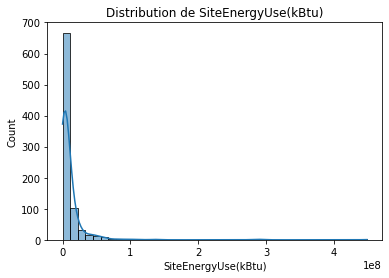

In [426]:
plt.title('Distribution de SiteEnergyUse(kBtu)')
sns.histplot(data_all['SiteEnergyUse(kBtu)'], bins=40, kde=True)
#plt.savefig('DistributionSiteEnergyUse.png')

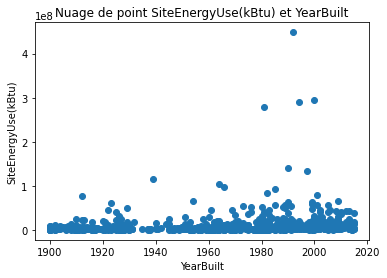

In [427]:
plt.title('Nuage de point SiteEnergyUse(kBtu) et YearBuilt')
plt.ylabel('SiteEnergyUse(kBtu)')
plt.xlabel('YearBuilt')
plt.scatter(data_all['YearBuilt'], data_all['SiteEnergyUse(kBtu)'])
#plt.savefig('Nuagedepoint SiteEnergyUse(kBtu) et YearBuilt.png')

#### Variable TotalGHGEmissions analysis

In [428]:
data_all['TotalGHGEmissions'].describe()

count      853.000000
mean       215.803148
std        875.389417
min          0.120000
25%         24.400000
50%         59.985000
75%        166.200000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

<AxesSubplot:title={'center':'Distribution de TotalGHGEmissions'}, xlabel='TotalGHGEmissions', ylabel='Count'>

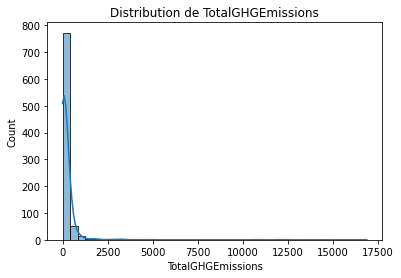

In [429]:
plt.title('Distribution de TotalGHGEmissions')
sns.histplot(data_all['TotalGHGEmissions'],bins = 40, kde=True)
#plt.savefig('DistributionTotalGHGEmissions.png')

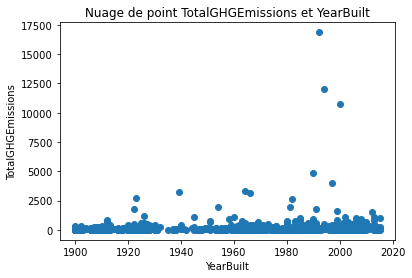

In [430]:
plt.title('Nuage de point TotalGHGEmissions et YearBuilt')
plt.ylabel('TotalGHGEmissions')
plt.xlabel('YearBuilt')
plt.scatter(data_all['YearBuilt'], data_all['TotalGHGEmissions'])
#plt.savefig('Nuagedepoint TotalGHGEmissions et YearBuilt.png')

###  Analysis of features' selection

In [431]:
#'PrimaryPropertyType''ListOfAllPropertyUseTypes'
#df_all = data_all[['DataYear','BuildingType','Neighborhood','PrimaryPropertyType','ListOfAllPropertyUseTypes','LargestPropertyUseTypeGFA','PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)','YearBuilt','NumberofBuildings','NumberofFloors','ENERGYSTARScore','SiteEnergyUse(kBtu)','NaturalGas(therms)','Electricity(kWh)','Electricity(kBtu)','GHGEmissionsIntensity','TotalGHGEmissions']]
df_all = data_all

In [432]:
listNumerical = data_all.select_dtypes(include=['float64','int64']).columns

In [433]:
#DataFrame with numerical features
#We remove the features which has no outliers
df_numerical = data_all[listNumerical].drop(['OSEBuildingID','DataYear', 'CouncilDistrictCode', 'YearBuilt', 'NumberofBuildings','NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking','PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA', 'ENERGYSTARScore'], axis=1)

In [434]:
#listCategorical = data_all.select_dtypes(include=['object','bool']).columns

In [435]:
#DataFrame avec variables categoriques
#df_categorical = data_all[['ListOfAllPropertyUseTypes','Neighborhood','BuildingType','PrimaryPropertyType']]
#df_categorical = data_all[listCategorical]

# Feature Engineering

# Outliers Analysis

In [436]:
#Outliers pour l'ensemble des variables numériques
#Le .at permet d'affecter une valeur dans une cellule du Dataframe
df_outlier_numerical = pd.DataFrame()
for j in df_numerical.columns:
    for k in np.arange(99.01, 100, 0.01):
        df_outlier_numerical.at[k, j] = np.percentile(df_numerical[j],k)

In [437]:
df_outlier_numerical.head(4)

,SiteEnergyUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData
99.01,9.534321e+07,2709.281618,10.97978,0.5
99.02,9.558354e+07,2718.395036,10.99256,0.5
99.03,9.582388e+07,2727.508454,11.00534,0.5
99.04,9.606422e+07,2736.621872,11.01812,0.5


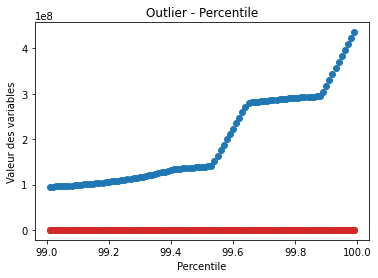

In [438]:
#Visualisation des percentiles pour les variables numériques
plt.title('Outlier - Percentile')
plt.ylabel('Valeur des variables')
plt.xlabel('Percentile')
for i in df_outlier_numerical.columns:
    plt.scatter(df_outlier_numerical.index,df_outlier_numerical[i])
#plt.savefig('Outlier.png')

In [439]:
df_numerical['SiteEnergyUse(kBtu)'].sort_values(ascending = False)

35      4.483853e+08
170     2.944517e+08
618     2.891500e+08
558     2.797747e+08
167     1.405294e+08
            ...     
1658    1.193296e+05
974     1.111844e+05
2199    1.103824e+05
2450    1.010257e+05
2189    1.697945e+04
Name: SiteEnergyUse(kBtu), Length: 853, dtype: float64

In [440]:
df_numerical['TotalGHGEmissions'].sort_values(ascending = False)

35      16870.980
618     12066.025
170     10757.605
167      4815.880
340      4020.490
          ...    
1590        1.630
1658        0.830
2199        0.785
974         0.775
2189        0.120
Name: TotalGHGEmissions, Length: 853, dtype: float64

In [441]:
df_numerical['GHGEmissionsIntensity'].describe()

count    853.000000
mean       1.535082
std        2.531799
min        0.000000
25%        0.270000
50%        0.715000
75%        1.730000
max       34.090000
Name: GHGEmissionsIntensity, dtype: float64

# Outliers removal

In [442]:
df_numerical.shape

(853, 4)

In [443]:
df_numerical.columns

Index(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'DefaultData'],
      dtype='object')

In [444]:
#Counting of outliers, observation of percentiles greater than 99.3 on each column of the df_numerical dataframe
for i in df_numerical.columns:
    print(df_numerical[df_numerical[i] > np.percentile(df_numerical[i],99.3)].shape)

(6, 4)
(6, 4)
(6, 4)
(6, 4)


the 99.3rd percentile of each feature becomes the most important value

In [445]:
#Filter percentiles greater than 99.3 on each column of the df_numerical dataframe
totalOutlier = []
for i in df_numerical.columns:
    totalOutlier += df_all[df_all[i] > np.percentile(df_all[i],99.3)].index.tolist()

In [446]:
tOtalDrop = np.unique(totalOutlier).tolist()

In [447]:
#Dataframe without outliers
df_all_filtered = df_all.drop(tOtalDrop)

In [448]:
df_all.shape

(853, 25)

In [449]:
df_all_filtered.shape

(835, 25)

# Check outliers removal

In [450]:
df_all_filtered['SiteEnergyUse(kBtu)'].sort_values(ascending = False)

1494    1.148643e+08
1672    9.656971e+07
559     9.374886e+07
49      8.291358e+07
309     8.002732e+07
            ...     
1658    1.193296e+05
974     1.111844e+05
2199    1.103824e+05
2450    1.010257e+05
2189    1.697945e+04
Name: SiteEnergyUse(kBtu), Length: 835, dtype: float64

In [451]:
df_all_filtered['TotalGHGEmissions'].sort_values(ascending = False)

1494    3237.855
1672    3161.370
262     2755.790
49      2648.825
98      1932.460
          ...   
1590       1.630
1658       0.830
2199       0.785
974        0.775
2189       0.120
Name: TotalGHGEmissions, Length: 835, dtype: float64

In [452]:
df_all_filtered['GHGEmissionsIntensity'].sort_values(ascending = False)

1753    13.650
2795    11.700
1337    11.045
47      10.895
373     10.815
         ...  
2199     0.020
974      0.015
609      0.015
380      0.015
2189     0.000
Name: GHGEmissionsIntensity, Length: 835, dtype: float64

# Data Backup

In [454]:
#df_all_filtered.to_csv("data_elec.csv", index=False)